---
# <center>
# <center> **PSI5790 - Aprendizado Profundo para Visão Computacional**
## <center> **Aula 01 - Exercícios**
---

## <center> **Jones Egydio**

---

# **Setup Python**


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

A linha `from PIL import Image` é uma instrução de importação em Python que carrega a classe `Image` do módulo PIL, que é um acrônimo para Python Imaging Library, mais recentemente conhecida como Pillow. Pillow é uma biblioteca de manipulação de imagens que adiciona suporte para abrir, manipular e salvar muitos formatos de arquivos de imagem diferentes.

## **Ex01**

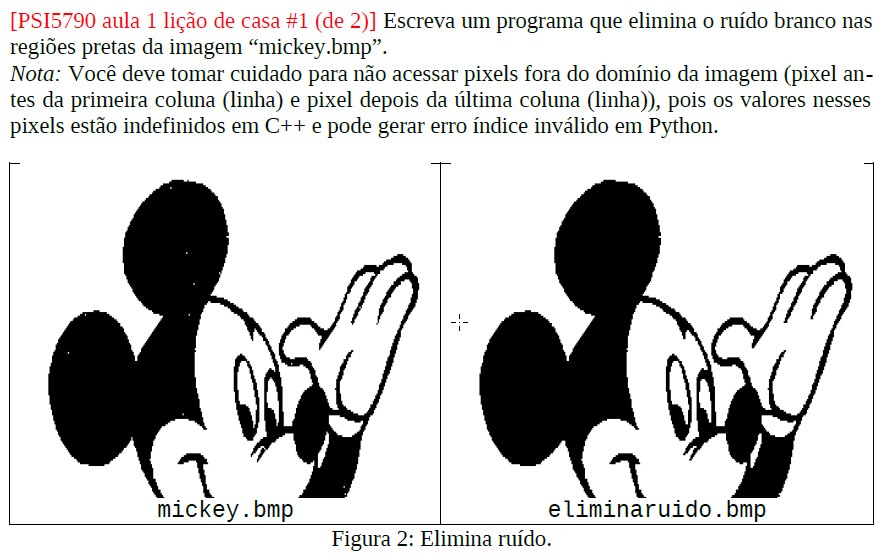

### Carregando a imagem

In [2]:
# Abrir a imagem original
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/mickey.bmp'

# Abrir a imagem original e converter para escala de cinza
img = Image.open(image_path).convert("L")

In [3]:
# Converter a imagem para um array NumPy
img_array = np.array(img)

In [4]:
print(img_array.shape)

(984, 673)


### Funções tratamento de ruído

In [5]:
# Função para verificar se um pixel é ruído
def is_noise(x, y, arr):
    # Se o pixel for branco (255) e pelo menos 6 dos vizinhos forem pretos (0), é ruído
    if arr[x, y] == 255 and np.sum(arr[x-1:x+2, y-1:y+2] == 0) >= 6:
        return True
    return False

A função `is_noise` é projetada para determinar se um dado pixel em uma imagem em escala de cinza é um pixel de ruído branco ou não. Aqui está o que cada parte faz:

- `def is_noise(x, y, arr):` Esta linha define a função `is_noise`, que aceita três argumentos: as coordenadas `x` e `y` do pixel que está sendo verificado e `arr`, que é o array NumPy que representa a imagem.

- `if arr[x, y] == 255:` Esta condição verifica se o pixel na posição (x, y) tem o valor 255, que representa um pixel branco em uma imagem de 8 bits em escala de cinza.

- `np.sum(arr[x-1:x+2, y-1:y+2] == 0) >= 6:` Esta parte do código conta quantos dos 8 pixels vizinhos (o entorno imediato em todas as direções) são pretos (`== 0`). A expressão `arr[x-1:x+2, y-1:y+2]` extrai uma submatriz 3x3 centrada no pixel (x, y), incluindo o próprio pixel e seus vizinhos. A comparação `== 0` produz uma matriz de valores booleanos (True/False) onde True corresponde aos pixels pretos. A função `np.sum` conta quantos valores são True (quantos vizinhos são pretos). Se o número de vizinhos pretos for pelo menos 6, a condição é satisfeita.

- `return True`: Se a condição acima for verdadeira, a função retorna `True`, indicando que o pixel é considerado ruído branco.

- `return False`: Se a condição não for satisfeita (ou seja, se o pixel não for branco ou se tiver menos de 6 vizinhos pretos), a função retorna `False`, indicando que o pixel não é considerado ruído.

Portanto, essa função pode ser usada em um loop para verificar cada pixel branco em uma imagem e determinar se é um pixel isolado (ruído) ou se faz parte de uma região maior de pixels brancos. Pixels identificados como ruído podem ser então alterados para preto (ou outra cor, dependendo do critério de limpeza de ruído desejado).

In [6]:
# Processar a imagem para remover ruído, evitando as bordas da imagem
for i in range(1, img_array.shape[0]-1):
    for j in range(1, img_array.shape[1]-1):
        if is_noise(i, j, img_array):
            img_array[i, j] = 0  # Alterar pixel de ruído para preto

Este trecho de código tem a função de percorrer cada pixel da imagem (com exceção das bordas) e aplicar a função `is_noise` que foi explicada anteriormente para verificar se o pixel é um ponto de ruído.

- `for i in range(1, img_array.shape[0]-1):` Este é um loop que percorre as linhas da imagem. `img_array.shape[0]` dá o número de linhas (altura) da imagem. O loop começa em 1 (`range(1, ...)`) e vai até a penúltima linha (`img_array.shape[0]-1`), evitando as bordas superior e inferior da imagem.

- `for j in range(1, img_array.shape[1]-1):` Este é um loop aninhado dentro do primeiro que percorre as colunas da imagem. `img_array.shape[1]` dá o número de colunas (largura) da imagem. Similar ao loop das linhas, começa em 1 e vai até a penúltima coluna, evitando as bordas laterais esquerda e direita.

- `if is_noise(i, j, img_array):` Dentro dos loops, usamos a função `is_noise` para verificar se o pixel na posição (i, j) é ruído. Se a função retornar `True`, o código dentro do `if` será executado.

- `img_array[i, j] = 0`: Se o pixel for identificado como ruído, alteramos seu valor para 0, que representa preto em uma imagem em escala de cinza. Isso efetivamente remove o ponto de ruído, substituindo-o por um pixel preto.

Assim, ao fim desses loops, todos os pixels de ruído branco isolados terão sido identificados e alterados para preto, "limpando" a imagem do ruído. Note que esta é uma operação in-loco, o que significa que a imagem original `img_array` está sendo modificada diretamente.

In [7]:
# Converter o array de volta para uma imagem PIL para salvar
cleaned_img = Image.fromarray(img_array)
cleaned_image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/mickey_cleaned_image.png'
cleaned_img.save(cleaned_image_path)

### Exibindo as imagens para comparação

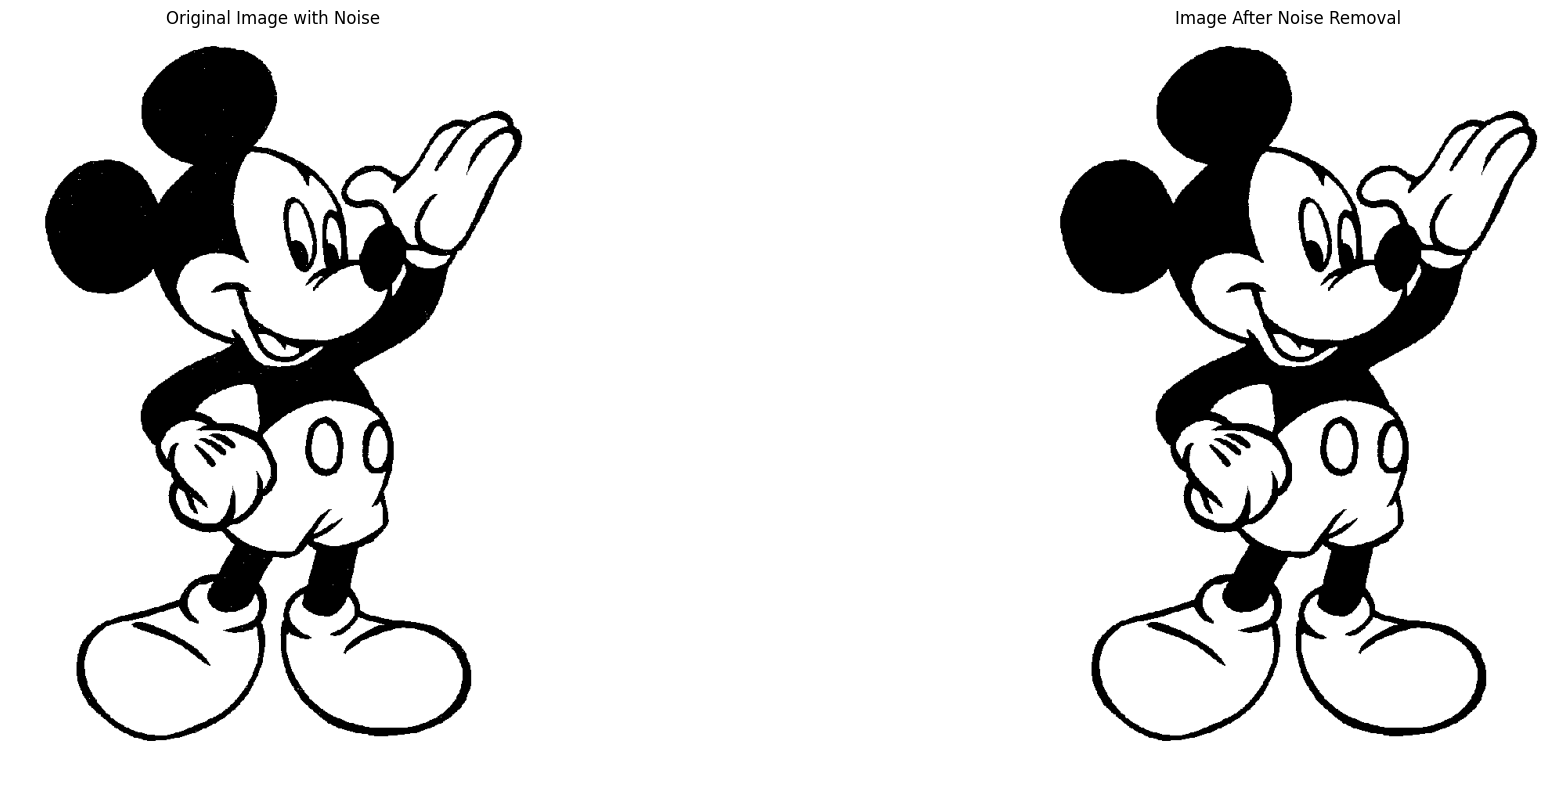

In [8]:
# Função para exibir imagens no notebook
def display_images(original, cleaned):
    plt.figure(figsize=(24, 10))

    # Imagem original com ruído
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image with Noise')
    plt.axis('off')

    # Imagem após remoção de ruído
    plt.subplot(1, 2, 2)
    plt.imshow(cleaned, cmap='gray')
    plt.title('Image After Noise Removal')
    plt.axis('off')

    plt.show()

# Exibir as imagens no notebook
display_images(img, cleaned_img)

---

## **Ex02**

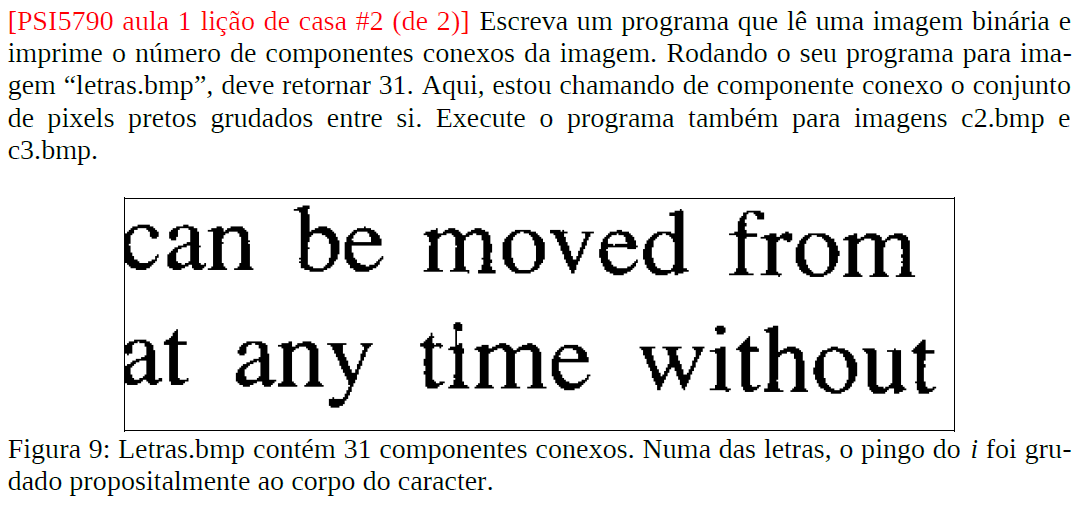

### **Usando o Scipy**

In [9]:
from scipy import ndimage
import numpy as np

# Carregar a imagem binária
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/letras.bmp'
img = Image.open(image_path).convert("L")

# Converter a imagem para um array binário (0 e 1)
# Pixels que têm um valor maior que um limiar são considerados 1 (branco), caso contrário 0 (preto)
# Aqui assumimos que o fundo é branco e os componentes são pretos
threshold = 128
binary_image = np.array(img) < threshold

# Usar rotulação de componentes conexos para identificar componentes individuais
# O retorno labeled_array é uma matriz onde cada componente conexo tem um rótulo exclusivo
# O retorno num_features é o número de componentes conexos encontrados
labeled_array, num_features = ndimage.label(binary_image)

# Imprimir o número de componentes conexos
num_features

31

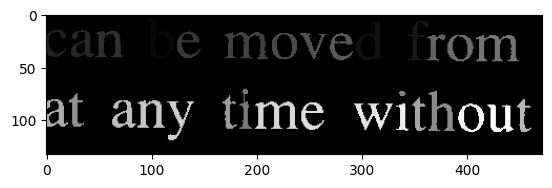

In [10]:
# Imagem analisada
plt.imshow(labeled_array, cmap='gray')
plt.show()

1. `threshold = 128`: Define um valor de limiar, comum em processamento de imagem, para converter a imagem em escala de cinza para uma imagem binária. O valor 128 é escolhido porque está no meio do intervalo de valores de pixel (0 a 255) para imagens de 8 bits.

2. `binary_image = np.array(img) < threshold`: Converte a imagem em escala de cinza para um array NumPy e realiza uma operação de binarização. Todos os pixels com valor menor que 128 são definidos como True (que se tornam 1 quando convertidos para um tipo inteiro) e representam os pixels pretos. Os pixels com valor maior ou igual a 128 são definidos como False (que se tornam 0), representando o fundo branco.

3. `labeled_array, num_features = ndimage.label(binary_image)`: Utiliza a função `label` do módulo `ndimage` da biblioteca SciPy para aplicar a rotulação de componentes conexos. A função `label` analisa a imagem binária e atribui um rótulo exclusivo a cada grupo conectado de pixels True (preto). `labeled_array` é o array com os rótulos atribuídos, e `num_features` é o número total de componentes conexos (ou grupos de pixels pretos conectados) encontrados.

4. `num_features`: Após executar a função, essa variável contém o número de componentes conexos detectados na imagem binária.

#### **c2**

In [11]:
# Carregar a imagem binária
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/c2.bmp'
img = Image.open(image_path).convert("L")

threshold = 128
binary_image = np.array(img) < threshold

labeled_array, num_features = ndimage.label(binary_image)

num_features

32

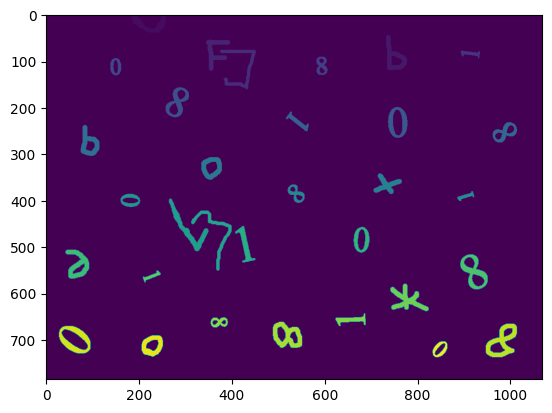

In [12]:
# Imagem analisada
plt.imshow(labeled_array)
plt.show()

#### **c3**

In [ ]:
# Carregar a imagem binária
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/c3.bmp'
img = Image.open(image_path).convert("L")

threshold = 128
binary_image = np.array(img) < threshold

labeled_array, num_features = ndimage.label(binary_image)

num_features

In [ ]:
# Imagem analisada
plt.imshow(labeled_array)
plt.show()

### Definindo as funções

In [13]:
from skimage.measure import label

A linha `from skimage.measure import label` importa a função `label` do submódulo `measure` da biblioteca `skimage`, que é o scikit-image, uma biblioteca de processamento de imagens para Python.

A função `label` é utilizada para rotulação de componentes conexos em uma imagem. O processo de rotulação identifica regiões conectadas em uma imagem binária, onde cada região conectada é formada por pixels adjacentes que têm o mesmo valor (geralmente 1 para o objeto de interesse e 0 para o fundo). A função `label` percorre a imagem e atribui um rótulo único a cada componente conexo encontrado, começando de 1 em diante. O resultado é uma imagem onde cada pixel do componente conexo tem o valor do rótulo correspondente ao componente ao qual pertence.

Este processo é comum em várias tarefas de processamento de imagem, como na identificação de objetos separados em uma imagem, na contagem de objetos ou na análise de formas e tamanhos de objetos em uma cena.

In [14]:
def load_and_binarize_image(image_path, threshold):
    # Carregar a imagem e converter para escala de cinza
    img = Image.open(image_path).convert("L")
    # Binarizar a imagem baseada no limiar
    binary_image = np.array(img) < threshold
    return binary_image

def count_connected_components(binary_image):
    # Aplicar rotulação de componentes conexos
    labeled_image = label(binary_image)
    # Contar o número de componentes conexos
    num_components = np.max(labeled_image)
    return num_components, labeled_image

Essas duas funções são projetadas para trabalhar em conjunto para carregar uma imagem, binarizá-la e contar seus componentes conexos:

1. `load_and_binarize_image(image_path, threshold)`: Esta função tem dois parâmetros, `image_path`, que é o caminho do arquivo da imagem que você quer processar, e `threshold`, que é o valor de limiar para a binarização. A função carrega a imagem usando a biblioteca Pillow (PIL), converte para escala de cinza (`"L"`), e então a converte em um array NumPy. Ela binariza a imagem usando o limiar fornecido: todos os pixels com intensidade abaixo do limiar são definidos como True (serão os pixels de interesse, geralmente objetos ou características), e os de intensidade igual ou superior são definidos como False (geralmente o fundo). A imagem binarizada é retornada.

2. `count_connected_components(binary_image)`: Esta função recebe uma imagem binarizada como entrada e aplica a rotulação de componentes conexos usando a função `label` que foi importada do `skimage.measure`. A imagem resultante, `labeled_image`, contém números inteiros, onde cada número representa um componente conexo diferente na imagem. Para contar o número de componentes conexos, a função encontra o valor máximo em `labeled_image`, que é o número total de componentes conexos identificados. A função retorna tanto o número de componentes conexos (`num_components`) quanto a própria imagem rotulada (`labeled_image`).

Number of connected components: 31


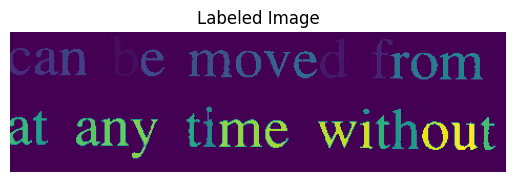

In [15]:
# Caminho para a imagem carregada
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/letras.bmp'

# Definir um limiar de binarização
threshold = 128

# Carregar e binarizar a imagem
binary_image = load_and_binarize_image(image_path, threshold)

# Contar os componentes conexos na imagem binarizada
num_components, labeled_image = count_connected_components(binary_image)

# Imprimir o número de componentes conexos
print(f"Number of connected components: {num_components}")

# Visualizar a imagem binarizada e a imagem rotulada
# Exibir apenas a imagem rotulada
plt.imshow(labeled_image)
plt.title('Labeled Image')
plt.axis('off')
plt.show()

1. `threshold = 128`: Define o valor do limiar de binarização. Este valor é um ponto de corte padrão para converter uma imagem em escala de cinza em uma imagem binária, onde os pixels mais escuros que o limiar são considerados o objeto de interesse.

2. `binary_image = load_and_binarize_image(image_path, threshold)`: Chama a função `load_and_binarize_image`, passando o caminho da imagem e o limiar definido, para obter a imagem binarizada.

3. `num_components, labeled_image = count_connected_components(binary_image)`: Chama a função `count_connected_components`, passando a imagem binarizada como argumento, para obter o número de componentes conexos e a imagem rotulada.

4. `print(f"Number of connected components: {num_components}")`: Imprime o número de componentes conexos encontrados na imagem.

5. O restante do código usa a biblioteca `matplotlib.pyplot` para visualizar a imagem rotulada. `plt.imshow(labeled_image)` exibe a imagem rotulada com os diferentes componentes conexos provavelmente mostrados em cores diferentes. `plt.title('Labeled Image')` define o título da visualização e `plt.axis('off')` desativa os eixos para uma visualização mais limpa. `plt.show()` exibe a figura resultante.

Number of connected components: 32


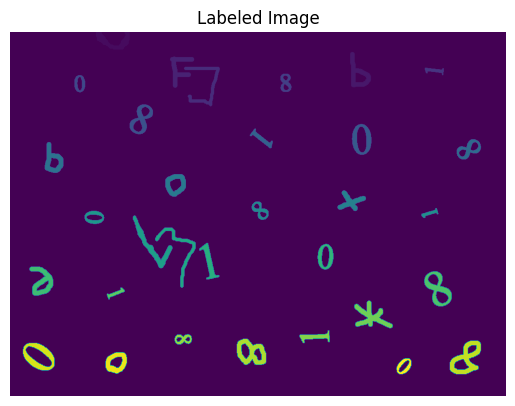

In [16]:
# Caminho para a imagem carregada
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/c2.bmp'

# Definir um limiar de binarização
threshold = 128

# Carregar e binarizar a imagem
binary_image = load_and_binarize_image(image_path, threshold)

# Contar os componentes conexos na imagem binarizada
num_components, labeled_image = count_connected_components(binary_image)

# Imprimir o número de componentes conexos
print(f"Number of connected components: {num_components}")

# Visualizar a imagem binarizada e a imagem rotulada
# Exibir apenas a imagem rotulada
plt.imshow(labeled_image)
plt.title('Labeled Image')
plt.axis('off')
plt.show()

Number of connected components: 31


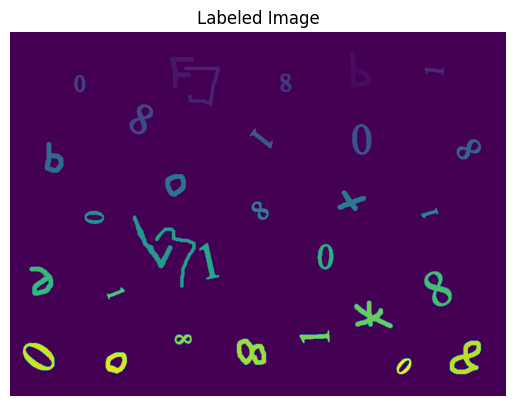

In [17]:
# Caminho para a imagem carregada
image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[2024 - PSI5790]/[ Aula 01 ]/c3.bmp'

# Definir um limiar de binarização
threshold = 128

# Carregar e binarizar a imagem
binary_image = load_and_binarize_image(image_path, threshold)

# Contar os componentes conexos na imagem binarizada
num_components, labeled_image = count_connected_components(binary_image)

# Imprimir o número de componentes conexos
print(f"Number of connected components: {num_components}")

# Visualizar a imagem binarizada e a imagem rotulada
# Exibir apenas a imagem rotulada
plt.imshow(labeled_image)
plt.title('Labeled Image')
plt.axis('off')
plt.show()